# **Лабораторна робота №5**
# **МІТ-31**
# **Ковальський Олександр**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

#1.  Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 2,3 з використанням Tensorflow & NN

In [ ]:
model_1 = pd.read_csv("./data.csv")
model_1

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1
3,3,2893,1,1,0,0,1
4,4,4010,1,0,0,1,1
...,...,...,...,...,...,...,...
328,328,4783,1,1,0,1,1
329,329,3276,0,0,0,0,1
330,330,2353,1,1,1,0,1
331,331,4522,0,0,0,1,0


In [ ]:
insurance = model_1
insurance.head()

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1
3,3,2893,1,1,0,0,1
4,4,4010,1,0,0,1,1


In [ ]:
insurance.isna().sum()

Unnamed: 0    0
salary        0
age           0
degree        0
gender        0
credits       0
is_gamer      0
dtype: int64

In [ ]:
insurance=pd.get_dummies(insurance)

insurance.head(3)

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1


In [ ]:
X=insurance.drop("salary", axis=1)
y=insurance["salary"]

X.head(), y.head()

(   Unnamed: 0  age  degree  gender  credits  is_gamer
 0           0    0       0       1        1         0
 1           1    1       0       0        0         0
 2           2    0       1       0        1         1
 3           3    1       1       0        0         1
 4           4    1       0       0        1         1, 0    3996
 1    1016
 2     420
 3    2893
 4    4010
 Name: salary, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)


tf.random.set_seed=13

ins_model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mse']
)

X_train.shape

(266, 6)

In [ ]:
ins_history = ins_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
9/9 [==============================] - 0s 2ms/step - loss: 9761922.0000 - mse: 9761922.0000
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 9697140.0000 - mse: 9697140.0000
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 9634226.0000 - mse: 9634226.0000
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 9571232.0000 - mse: 9571232.0000
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 9509084.0000 - mse: 9509084.0000
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 9449011.0000 - mse: 9449011.0000
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 9387305.0000 - mse: 9387305.0000
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 9328437.0000 - mse: 9328437.0000
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 9269171.0000 - mse: 9269171.0000
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 92

In [ ]:
ins_history2 = ins_model.fit(X_train,y_train,epochs=200, verbose=0)

score1=ins_model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 3519576.0000 - mse: 3519576.0000


In [ ]:
ins_model.save("model.h5")

ins_model_loaded=tf.keras.models.load_model("model.h5")


y1=ins_model.predict(X_test)
y2=ins_model_loaded.predict(X_test)

(y1-y2).sum()

X_train.head()

,Unnamed: 0,age,degree,gender,credits,is_gamer
58,58,1,1,1,0,1
259,259,0,1,1,0,1
95,95,0,0,0,0,0
131,131,1,0,1,1,0
286,286,1,1,1,1,0


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

insurance2 = model_1
insurance2.head(2)

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0


In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(),["age", "degree","gender"]), 
    (OneHotEncoder(handle_unknown="ignore"),['credits','is_gamer'])
)
X=insurance2.drop("salary", axis=1)
y = insurance2["salary"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

im3= tf.keras.Sequential([ 
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [ ]:
im3.compile(
    loss=mae, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["mae"]
)
history_im3=im3.fit(X_train_norm,y_train,validation_split=0.3,epochs=30,verbose=0)

im3.evaluate(X_test_norm,y_test)

X_train.shape

3/3 [==============================] - 0s 3ms/step - loss: 2255.2683 - mae: 2255.2683


(266, 6)

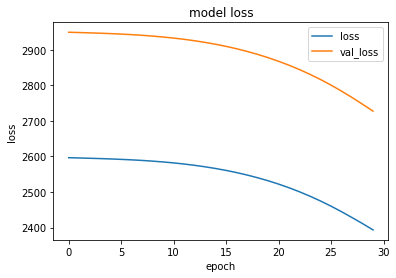

In [ ]:
plt.plot(history_im3.history['loss'])
plt.plot(history_im3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [ ]:
import matplotlib as plt
import sklearn.model_selection
import sklearn.datasets
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [ ]:
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [ ]:
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3577 - accuracy: 0.1124 - val_loss: 1.9512 - val_accuracy: 0.2022
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7976 - accuracy: 0.2385 - val_loss: 1.7072 - val_accuracy: 0.2763
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6774 - accuracy: 0.2718 - val_loss: 1.6454 - val_accuracy: 0.2814
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6353 - accuracy: 0.2838 - val_loss: 1.6012 - val_accuracy: 0.3277
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5411 - accuracy: 0.3522 - val_loss: 1.4708 - val_accuracy: 0.3617
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4364 - accuracy: 0.3787 - val_loss: 1.4185 - val_accuracy: 0.4011
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4030 - accuracy: 0.3938 - val_loss: 1.3993 - val_accuracy:

In [ ]:
train_data.min(), train_data.max()

train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2058 - accuracy: 0.5680 - val_loss: 0.7610 - val_accuracy: 0.7118
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6737 - accuracy: 0.7471 - val_loss: 0.6572 - val_accuracy: 0.7528
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6178 - accuracy: 0.7688 - val_loss: 0.6312 - val_accuracy: 0.7662
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5906 - accuracy: 0.7846 - val_loss: 0.6205 - val_accuracy: 0.7760
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5727 - accuracy: 0.7943 - val_loss: 0.5974 - val_accuracy: 0.7862
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5605 - accuracy: 0.8000 - val_loss: 0.5913 - val_accuracy: 0.7929
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5509 - accuracy: 0.8042 - val_loss: 0.5824 - val_accuracy:

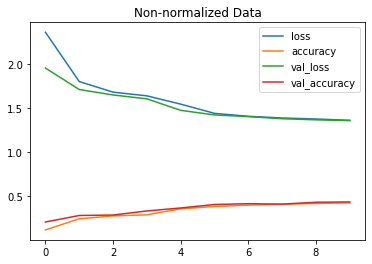

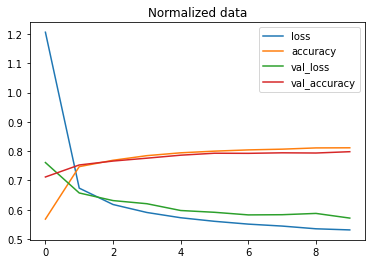

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [ ]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1182 - accuracy: 0.5727 - val_loss: 0.7753 - val_accuracy: 0.7271
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7052 - accuracy: 0.7526 - val_loss: 0.6814 - val_accuracy: 0.7629
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6453 - accuracy: 0.7749 - val_loss: 0.6576 - val_accuracy: 0.7708
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6175 - accuracy: 0.7836 - val_loss: 0.6414 - val_accuracy: 0.7748
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6021 - accuracy: 0.7899 - val_loss: 0.6274 - val_accuracy: 0.7826
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5926 - accuracy: 0.7941 - val_loss: 0.6199 - val_accuracy: 0.7903
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5868 - accuracy: 0.7963 - val_loss: 0.6275 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

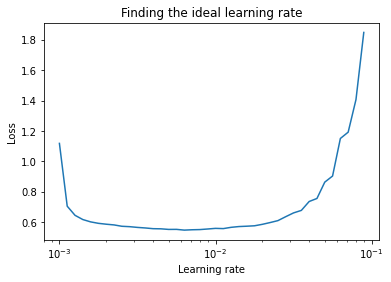

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5604 - accuracy: 0.3614 - val_loss: 1.2691 - val_accuracy: 0.4626
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0964 - accuracy: 0.5461 - val_loss: 0.9637 - val_accuracy: 0.5850
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9256 - accuracy: 0.6101 - val_loss: 0.9220 - val_accuracy: 0.6177
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8926 - accuracy: 0.6219 - val_loss: 0.8995 - val_accuracy: 0.6333
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8142 - accuracy: 0.6741 - val_loss: 0.7865 - val_accuracy: 0.7201
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7121 - accuracy: 0.7498 - val_loss: 0.7335 - val_accuracy: 0.7445
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6746 - accuracy: 0.7638 - val_loss: 0.7048 - val_accuracy:

In [ ]:
y_probs = model_14.predict(test_data)

y_probs[:5]

array([[1.1174486e-08, 6.4949688e-22, 1.2616249e-13, 5.1133651e-07,
        2.0181294e-09, 1.3597256e-01, 1.9048073e-08, 5.5695474e-02,
        4.7011298e-04, 8.0786121e-01],
       [3.7675600e-02, 1.1438950e-05, 7.4422646e-01, 4.8360607e-04,
        3.7420005e-02, 2.6079049e-04, 1.7779231e-01, 9.5526382e-05,
        2.0336143e-03, 7.3366499e-07],
       [1.5998710e-03, 9.9655032e-01, 5.5456577e-11, 1.8325528e-03,
        2.0210328e-10, 1.2167938e-05, 3.7769192e-07, 2.9822207e-09,
        2.6842061e-08, 4.7158237e-06],
       [4.9131643e-04, 9.9853373e-01, 1.9397192e-12, 9.6653635e-04,
        1.2341423e-11, 4.8325614e-06, 4.2263412e-08, 5.7904304e-10,
        4.5920516e-09, 3.4203347e-06],
       [4.5901442e-01, 2.6170369e-03, 1.6836959e-01, 1.6327158e-02,
        2.2522444e-02, 3.3129014e-03, 3.2232529e-01, 3.0588309e-04,
        5.1781838e-03, 2.7134873e-05]], dtype=float32)

In [ ]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 0, 1, 4, 4, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[801,   2,  45,  75,  20,   1,  46,   0,  10,   0],
       [ 21, 927,   6,  34,   5,   0,   7,   0,   0,   0],
       [ 34,   0, 696,  15, 210,   0,  38,   0,   7,   0],
       [ 63,   8,  10, 793,  79,   0,  38,   0,   9,   0],
       [  2,   0, 155,  32, 771,   0,  29,   0,  11,   0],
       [  0,   0,   0,   3,   1, 925,   1,  43,   1,  26],
       [189,   1, 207,  45, 422,   0, 122,   0,  14,   0],
       [  0,   0,   0,   0,   0,  46,   0, 922,   0,  32],
       [  2,   0,  11,  12,  65,   3,   5,   9, 889,   4],
       [  0,   0,   0,   8,   0,  29,   1,  36,   4, 922]])

In [ ]:
import random
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

In [ ]:
model_14.layers

In [ ]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.0707681 ,  0.39338773, -0.07155726, -0.53593034],
        [ 0.62015647,  0.56768644,  0.36613598, -0.31550515],
        [ 0.5805089 , -0.3042451 ,  0.53441983, -0.8899578 ],
        ...,
        [ 0.13956186,  0.53869915,  0.28916803, -0.27927038],
        [-0.41719392,  0.77267724,  0.2981089 , -0.07036553],
        [-0.61070853,  0.49501845, -0.2643993 ,  0.11550435]],
       dtype=float32), (784, 4))

In [ ]:
biases, biases.shape

(array([2.3173866, 2.8882787, 0.5393872, 1.5830705], dtype=float32), (4,))

In [ ]:
model_14.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_49 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_50 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


#2.  Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab5.